# **GRADED CHALLENGE 1**

*Nadhifa Safira*

HCK BATCH 6

**Problem Statement**

Wabah Covid-19 telah menjadi ancaman serius di seluruh dunia, termasuk di Australia. Jumlah orang yang terinfeksi dan korban jiwa akibat virus ini terus meningkat sejak tahun 2020 hingga pertengahan tahun 2023. Kasus terjangkit COVID-19 di Australia pada rentang waktu 2020 hingga 2023 mengalami perkembangan yang sangat signifikan.

**Objectives**

Notebook ini akan digunakan untuk menganalisis data mengenai jumlah kasus Covid-19 di berbagai wilayah di Australia. Analisis tersebut bertujuan untuk mengidentifikasi wilayah yang memiliki tingkat penyebaran virus Covid-19 paling tinggi, serta wilayah yang kurang terkontaminasi oleh pandemi global ini.



**QUERY**

SELECT datacovid.province_state as provinsi,
datacovid.country_region as wilayah,
datacovid.date as tahun_tanggal,
datacovid.confirmed as positif_covid,
datacovid.deaths as kematian,
FROM `bigquery-public-data.covid19_jhu_csse.summary` as datacovid
WHERE datacovid.country_region ='Australia'
ORDER BY datacovid.date ASC

Data set diatas diambil menggunakan SQL melalui Google Cloud Platform yang menampilkan data-data covid-19 yang terdaftar di berbagai wilayah di Australia.

**Import Library**

In [112]:
!pip install pandas

In [191]:
#Import library yang akan digunakan
import pandas as pd
import numpy as np

**Data Loading**

In [194]:
# Mengimport file csv menjadi data frame melalui folder lalu mengganti "tahun_tanggal" menjadi type data date karena tadinya tertera sebagai object.
df = pd.read_csv('/Users/nadhifarares/Documents/GC1/h8dsft_P0GC1_NadhifaSafira.csv',parse_dates=["tahun_tanggal"])

In [195]:
#Check 5 data terawal dari data frame 
df.head(5)

,provinsi,wilayah,tahun_tanggal,positif_covid,kematian
0,NaN,Australia,2020-01-23,NaN,NaN
1,NaN,Australia,2020-01-25,4.0,NaN
2,NaN,Australia,2020-01-26,4.0,NaN
3,New South Wales,Australia,2020-01-27,4.0,NaN
4,Victoria,Australia,2020-01-27,1.0,NaN


In [196]:
#Check 5 data terakhir dari data frame
df.tail(5)

,provinsi,wilayah,tahun_tanggal,positif_covid,kematian
8975,Queensland,Australia,2023-03-09,1800236.0,2783.0
8976,South Australia,Australia,2023-03-09,883620.0,1365.0
8977,Tasmania,Australia,2023-03-09,287507.0,256.0
8978,Victoria,Australia,2023-03-09,2880559.0,7370.0
8979,Western Australia,Australia,2023-03-09,1293461.0,952.0


**Data Cleaning**

In [198]:
#Melihat info dari data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8980 entries, 0 to 8979
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   provinsi       8977 non-null   object        
 1   wilayah        8980 non-null   object        
 2   tahun_tanggal  8980 non-null   datetime64[ns]
 3   positif_covid  8979 non-null   float64       
 4   kematian       8965 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 350.9+ KB


In [200]:
#Menghapus data null berdasarkan baris
df.dropna(axis=0)

df = df.dropna(axis=0)

In [204]:
#Check apakah masih ada data yang null atau data kosong atau tidak
df.isnull().sum()

provinsi         0
wilayah          0
tahun_tanggal    0
positif_covid    0
kematian         0
dtype: int64

In [215]:
#Mengganti nama nama kolom di data frame serta membuat dataframe baru
df.rename(columns={'provinsi' : 'States', 'wilayah' : 'Country', 'tahun_tanggal' : 'Date', 'positif_covid' : 'Confirmed', 'kematian' : 'Deaths'})
print(newdf)

df =df.rename(columns={'provinsi' : 'States', 'wilayah' : 'Country', 'tahun_tanggal' : 'Date', 'positif_covid' : 'Confirmed', 'kematian' : 'Deaths'})
print(newdf)

               provinsi    wilayah tahun_tanggal  positif_covid  kematian
15      New South Wales  Australia    2020-02-01            4.0       0.0
16             Victoria  Australia    2020-02-01            4.0       0.0
17           Queensland  Australia    2020-02-01            3.0       0.0
18      South Australia  Australia    2020-02-01            1.0       0.0
19      New South Wales  Australia    2020-02-02            4.0       0.0
...                 ...        ...           ...            ...       ...
8975         Queensland  Australia    2023-03-09      1800236.0    2783.0
8976    South Australia  Australia    2023-03-09       883620.0    1365.0
8977           Tasmania  Australia    2023-03-09       287507.0     256.0
8978           Victoria  Australia    2023-03-09      2880559.0    7370.0
8979  Western Australia  Australia    2023-03-09      1293461.0     952.0

[8965 rows x 5 columns]
               provinsi    wilayah tahun_tanggal  positif_covid  kematian
15      New S

In [216]:
df

,States,Country,Date,Confirmed,Deaths
15,New South Wales,Australia,2020-02-01,4.0,0.0
16,Victoria,Australia,2020-02-01,4.0,0.0
17,Queensland,Australia,2020-02-01,3.0,0.0
18,South Australia,Australia,2020-02-01,1.0,0.0
19,New South Wales,Australia,2020-02-02,4.0,0.0
...,...,...,...,...,...
8975,Queensland,Australia,2023-03-09,1800236.0,2783.0
8976,South Australia,Australia,2023-03-09,883620.0,1365.0
8977,Tasmania,Australia,2023-03-09,287507.0,256.0
8978,Victoria,Australia,2023-03-09,2880559.0,7370.0


**DATA EXPLORATION**

***Dalam upaya mencari wilayah di Australia yang memiliki jumlah kasus terjangkit virus Covid-19 terbanyak, dilakukan analisis untuk mengidentifikasi wilayah yang paling terdampak oleh penyebaran virus tersebut di negara tersebut.***

In [280]:
#Mencari tau top 3 kasus covid terbanyak di berbagai bagian negara Australia
top_three_covid = df.groupby('States').max().sort_values(by='Confirmed', ascending=False)['Confirmed'][:5]
top_three_covid

States
New South Wales      3915992.0
Victoria             2880559.0
Queensland           1800236.0
Western Australia    1293461.0
South Australia       883620.0
Name: Confirmed, dtype: float64

<Axes: ylabel='Confirmed'>

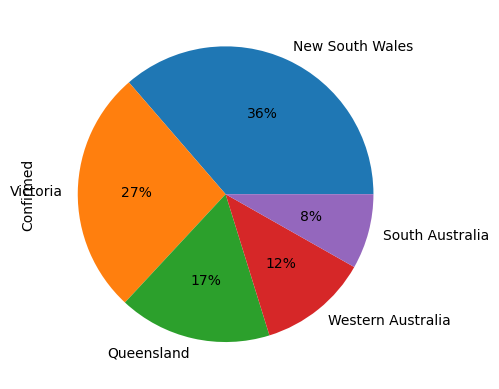

In [281]:
# Menjadikkan data sebagai pie chart untuk melihat persentase data
df.groupby('States').max().sort_values(by='Confirmed', ascending=False)['Confirmed'][:5].head().plot(kind='pie',autopct='%.0f%%')

Terdapat data yang menunjukkan bahwa pada rentang tahun 2020-2023, persentase penduduk yang terpapar virus Covid-19 di wilayah New South Wales mencapai 36%, di wilayah Victoria mencapai 27%, dan di wilayah Queensland mencapai 17% di negara Australia.

In [268]:
# Mengetahui jumlah berapa banyak orang yang meninggal diakibatkan oleh Covid-19
top_three_deaths = df.groupby('States').max().sort_values(by='Deaths', ascending=False)['Deaths'][:5]
top_three_deaths

States
Victoria             7370.0
New South Wales      6529.0
Queensland           2783.0
South Australia      1365.0
Western Australia     952.0
Name: Deaths, dtype: float64

<Axes: xlabel='States'>

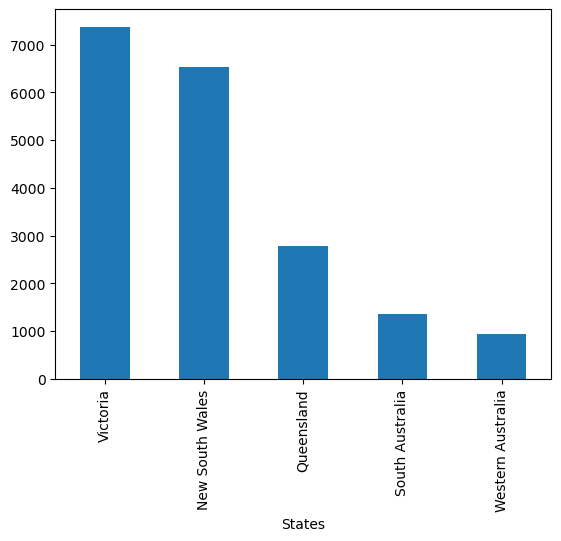

In [294]:
#Merubah data menjadi bar-chart
top_three_deaths.plot(kind='bar')

Berdasarkan grafik batang di atas, terlihat bahwa terdapat sekitar 7000 korban jiwa akibat virus Covid-19 di wilayah Victoria, sekitar 6000 korban jiwa di wilayah New South Wales, dan hampir 3000 korban jiwa di wilayah Queensland di Australia.

In [307]:
# Melihat hanya data entry untuk New South Wales 
hasil_nsw = df[df['States'] == 'New South Wales']
hasil_nsw


,States,Country,Date,Confirmed,Deaths
15,New South Wales,Australia,2020-02-01,4.0,0.0
19,New South Wales,Australia,2020-02-02,4.0,0.0
23,New South Wales,Australia,2020-02-03,4.0,0.0
27,New South Wales,Australia,2020-02-04,4.0,0.0
31,New South Wales,Australia,2020-02-05,4.0,0.0
...,...,...,...,...,...
8941,New South Wales,Australia,2023-03-05,3908129.0,6493.0
8949,New South Wales,Australia,2023-03-06,3908129.0,6493.0
8957,New South Wales,Australia,2023-03-07,3908129.0,6493.0
8965,New South Wales,Australia,2023-03-08,3908129.0,6493.0


In [312]:
# Mengetahui kapan kasus covid-19 di New South Wales tertinggi terjadi dengan melihat dari data paling akhir
hasil_nsw.tail(1)

,States,Country,Date,Confirmed,Deaths
8973,New South Wales,Australia,2023-03-09,3915992.0,6529.0


Pada tahun 2023, tercatat sebanyak 3.915.992 kasus Covid-19 di New South Wales, yang menyebabkan kehilangan nyawa sebanyak 6.529 orang. Jumlah kasus dan korban jiwa tersebut merupakan yang tertinggi di seluruh negara Australia.

In [300]:
#Mencari tahu diwilayah mana yang paling sedikit terjangkit covid-19 untuk dibandingkan
less_case = df.groupby('States').min().sort_values(by='Confirmed', ascending=False)['Confirmed']
less_case

States
New South Wales                 4.0
Victoria                        4.0
Queensland                      2.0
Western Australia               2.0
Australian Capital Territory    1.0
South Australia                 1.0
Tasmania                        1.0
External territories            0.0
From Diamond Princess           0.0
Jervis Bay Territory            0.0
Northern Territory              0.0
Name: Confirmed, dtype: float64

In [301]:
# Wilayah-wilayah yang tidak terlalu banyak terjangkit penyakit covid-19
less_case.tail()

States
Tasmania                 1.0
External territories     0.0
From Diamond Princess    0.0
Jervis Bay Territory     0.0
Northern Territory       0.0
Name: Confirmed, dtype: float64

<Axes: xlabel='States'>

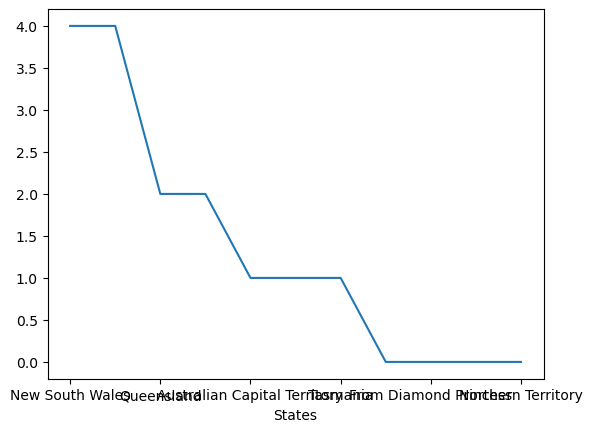

In [317]:
#Melihat hasil chart melalui line graph agar lebih gampang untuk dibaca
less_case.plot()

In [305]:
hasil_nt = df[df['States'] == 'Northern Territory']
hasil_nt


,States,Country,Date,Confirmed,Deaths
166,Northern Territory,Australia,2020-03-04,1.0,0.0
174,Northern Territory,Australia,2020-03-05,1.0,0.0
184,Northern Territory,Australia,2020-03-06,0.0,0.0
192,Northern Territory,Australia,2020-03-07,0.0,0.0
200,Northern Territory,Australia,2020-03-08,0.0,0.0
...,...,...,...,...,...
8942,Northern Territory,Australia,2023-03-05,105021.0,90.0
8950,Northern Territory,Australia,2023-03-06,105021.0,90.0
8958,Northern Territory,Australia,2023-03-07,105021.0,90.0
8966,Northern Territory,Australia,2023-03-08,105021.0,90.0


In [311]:
hasil_nt.tail(1)

,States,Country,Date,Confirmed,Deaths
8974,Northern Territory,Australia,2023-03-09,105111.0,91.0


Hingga tahun 2023, tercatat sebanyak 105.111 kasus Covid-19 di Northern Territory, dengan jumlah korban jiwa sebanyak 91. Angka ini merupakan yang terendah di antara kasus Covid-19 di seluruh negara Australia.

# **Conclusion & Assumptions**

***Assumptions***

Berjalan dengan latar belakang masalah yang telah disebutkan sebelumnya, terbukti bahwa kasus infeksi dan korban jiwa akibat Covid-19 di Australia mengalami peningkatan. Namun, terdapat juga beberapa negara lain yang mengalami tingkat penyebaran Covid-19 yang stabil, bahkan hanya menyebabkan kurang dari 100 kematian per tahunnya. 

Perbedaan ini mungkin disebabkan oleh ketidakmerataan persebaran penduduk di Australia. Sebagian besar penduduk Australia tinggal di wilayah pesisir timur, tenggara, dan selatan, seperti Sydney di New South Wales, Melbourne di Victoria, dan Brisbane di Queensland. Faktanya, sekitar 70% wilayah Australia merupakan daerah gurun yang memiliki kondisi lingkungan yang kurang mendukung dan sumber daya alam yang terbatas. Akibatnya, populasi penduduk di wilayah pedalaman dan gurun cenderung lebih sedikit. Oleh karena itu, beberapa negara bagian di Australia jarang terpapar virus Covid-19.

***Conclusion***

1. Wilayah 'New South Wales' mencatat tingkat kasus Covid-19 tertinggi di Australia, dengan jumlah kasus sebanyak 3.915.992 dan jumlah korban jiwa sebanyak 6.529. Kejadian ini terjadi dari tahun 2020 hingga 2023.
2. Sebaliknya, wilayah 'Northern Territory' memiliki tingkat kasus Covid-19 yang paling rendah di Australia. Meskipun terdapat sekitar 105.111 kasus Covid-19, jumlah korban jiwa hanya mencapai 91 orang. Selama tiga tahun, wilayah ini tidak pernah melaporkan jumlah kematian melebihi angka 100.
3. Jika dibandingkan dengan wilayah-wilayah seperti New South Wales, Victoria, dan Queensland, terlihat bahwa wilayah-wilayah seperti Northern Territory, Jervis Bay Territory, dan From Diamond Princess memiliki tingkat paparan virus Covid-19 yang paling rendah di Australia.

Kesimpulan ini menegaskan adanya variasi dalam tingkat paparan dan dampak Covid-19 di berbagai wilayah di Australia. Wilayah-wilayah dengan tingkat kasus yang tinggi perlu mengambil langkah-langkah lebih lanjut untuk mengendalikan penyebaran virus, sementara wilayah-wilayah dengan tingkat paparan rendah dapat dijadikan contoh dalam penerapan langkah-langkah pencegahan yang efektif.